In [181]:
from pathlib import Path
import pandas as pd
import numpy as np
from fast_ml.model_development import train_valid_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from joblib import dump, load

In [152]:
ROOT_DIR = Path.cwd().parent
ROOT_DIR

WindowsPath('c:/Users/user/Desktop/10_Academy/Week_2')

In [153]:
DATA_PATH = (ROOT_DIR / "data").resolve()

In [154]:
df = pd.read_csv((DATA_PATH/"AdSmartABdata.csv").resolve(), parse_dates=["date"])

In [155]:
browser_split = df.drop(columns=["browser"], axis=1)

In [156]:
def response(row):
    if row["yes"] > 0:
        return 1
    elif row["no"] > 0:
        return 0
    else:
        return -1

In [157]:
browser_split["response"] = browser_split.apply(response, axis=1)

In [158]:
browser_split = browser_split.loc[browser_split["response"] != -1]

In [159]:
browser_split.drop(columns=["yes", "no"], axis=1, inplace=True)

In [160]:
browser_split.reset_index(drop=True, inplace=True)

In [161]:
browser_split.to_csv((DATA_PATH/"browser_split.csv"), index=False)

In [162]:
browser_split.head()

,auction_id,experiment,date,hour,device_make,platform_os,response
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,0


In [163]:
X = browser_split[["experiment", "device_make", "platform_os"]]
y = browser_split["response"]

In [164]:
features = browser_split[["experiment", "device_make", "platform_os", "response"]]

In [165]:
features["experiment"] = features.apply(lambda row: 1 if row["experiment"] == "exposed" else 0, axis=1)

In [166]:
encoder = LabelEncoder()

In [167]:
encoded_features = encoder.fit_transform(features["device_make"])

In [168]:
features["device_make"] = encoded_features

In [169]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(features, target = "response", 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

In [191]:
# save splits
X_train.join(y_train).to_csv((DATA_PATH/"train.csv").resolve(), index=False)
X_valid.join(y_valid).to_csv((DATA_PATH/"validate.csv").resolve(), index=False)
X_test.join(y_test).to_csv((DATA_PATH/"test.csv").resolve(), index=False)

In [ ]:
X_train.to_csv

In [170]:
X_train.head()

,experiment,device_make,platform_os
241,1,13,6
384,1,27,6
262,1,71,6
617,1,62,6
123,0,13,6


In [171]:
forest = RandomForestClassifier()

In [172]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
y_pred = forest.predict(X_test)

In [174]:
accuracy_score(y_test, y_pred)

0.504

In [175]:
X_train.head()

,experiment,device_make,platform_os
241,1,13,6
384,1,27,6
262,1,71,6
617,1,62,6
123,0,13,6


In [176]:
feature_imp = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [177]:
feature_imp

device_make    0.974699
experiment     0.016528
platform_os    0.008773
dtype: float64

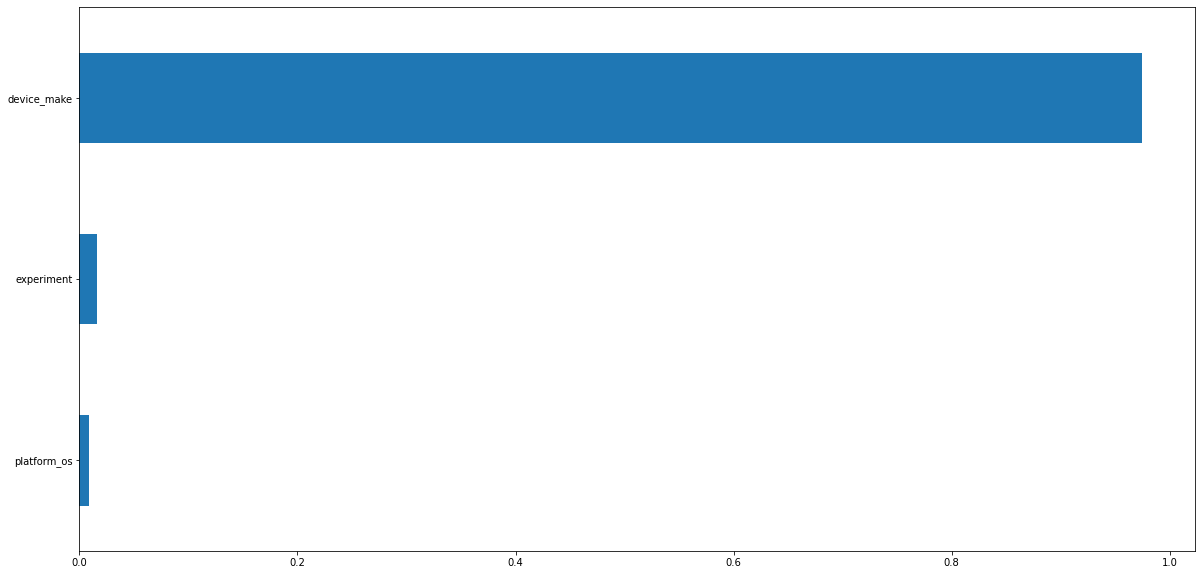

In [178]:
feature_imp.plot(kind="barh", figsize=(20, 10)).invert_yaxis()

In [179]:
scores = cross_val_score(forest, X_valid, y_valid, scoring='accuracy', cv=5)

In [180]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.532 (0.064)


In [182]:
MODELS_PATH = (ROOT_DIR / "models").resolve()

In [183]:
dump(value=forest, filename=(MODELS_PATH/"random_forest.pkl"), compress=9)

['C:\\Users\\user\\Desktop\\10_Academy\\Week_2\\models\\random_forest.pkl']